### DOWNLOADING DATA



In [ ]:
import pandas as pd

# Data used from past homework
df = pd.read_csv("segm_input_data.csv", sep= "|")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import preprocessing

del df['CUST_INTRL_ID']
del df['CUST_TYPE_CD']
del df['JRSDCN_CD']

df.head()

,TOTAL_TURNOVER,TOTAL_IN,TOTAL_IN_CT,TOTAL_OUT,TOTAL_OUT_CT,TOTAL_SAVING,SAVING_RATIO,STDDEV_MONTHLY,STABLE_INCOME,DORMACY_MONTHS,CASH_IN_RATIO,CASH_OUT_RATIO,WIRE_IN_RATIO,WIRE_OUT_RATIO
0,31510027.0,15765924.67,56.25,15744102.25,6.08,21822.42,0.00,2.58,1.00,0,0.02,0.00,0.79,0.01
1,19112.0,13166.67,0.58,5945.00,6.67,7221.67,0.38,1.96,0.83,0,0.00,0.69,1.00,0.08
2,26318848.0,13235607.42,18.00,13083240.83,13.58,152366.58,0.01,0.32,1.00,0,0.61,0.18,0.38,0.19
3,97794612.0,64927307.62,21.67,32867304.79,12.00,32060002.82,0.33,1.22,0.83,0,0.34,0.00,0.66,0.33
4,19782.0,16362.50,0.25,3419.08,1.00,12943.42,0.65,2.04,0.92,0,0.00,0.31,0.24,0.12


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


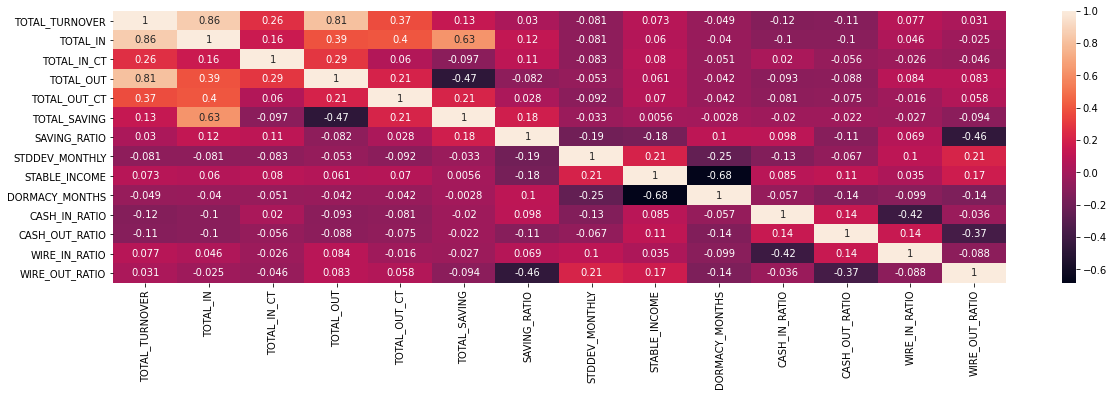

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
plt.rcParams["figure.figsize"] = (20,5)
sn.heatmap(corrMatrix, annot=True)
plt.show()

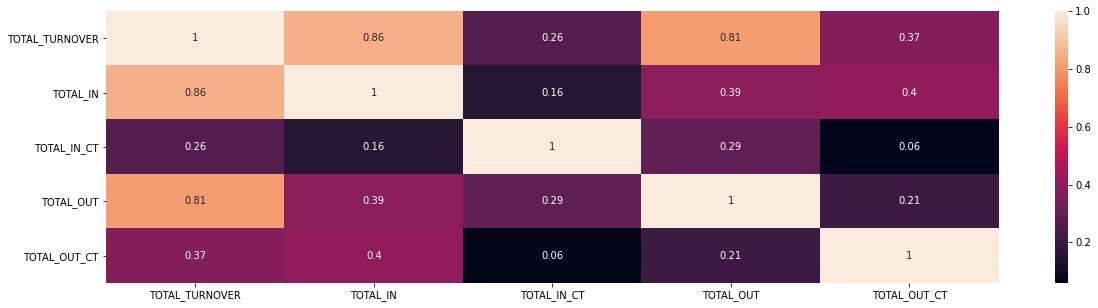

In [ ]:
# Based on the correlation matrix, I chose the following features
test = df[['TOTAL_TURNOVER', 'TOTAL_IN', 'TOTAL_IN_CT', 'TOTAL_OUT','TOTAL_OUT_CT']]

corrMatrix = test.corr()
plt.rcParams["figure.figsize"] = (20,5)
sn.heatmap(corrMatrix, annot=True)
plt.show()

## CART


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# feature set
X=test.iloc[:,1:5]
#label set
y=test.iloc[:,0]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

model=DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.03937007874015748

## C4.5 

In [ ]:
## I analyzed different algorithms. But it seems that all the others are previous versions. So they are worse. And even in sclearn the main implementation is the implementation of CART. additional analysis may be on githab


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model_random_forest = RandomForestClassifier(max_depth=4, random_state=0)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
model_random_forest.score(X_test, y_test)
# the result is not very good but not the worst

0.031496062992125984

In [27]:
import numpy as np
features = ['TOTAL_TURNOVER', 'TOTAL_IN', 'TOTAL_IN_CT', 'TOTAL_OUT','TOTAL_OUT_CT']
importances = model_random_forest.feature_importances_
indices = np.argsort(importances)

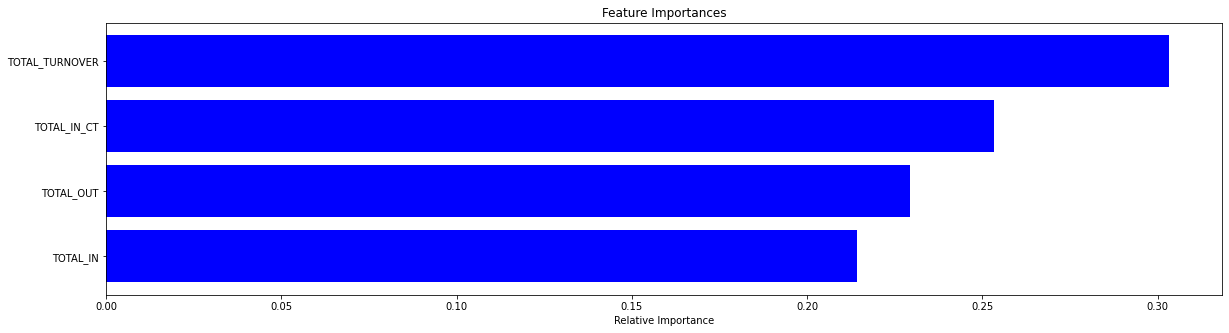

In [30]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [37]:
## The results are logical, feature importance only confirms what we obtained as a result of correlation analysis.
## During the experiment, the algorithm worked better when increasing the max_depth parameter.

0.031496062992125984


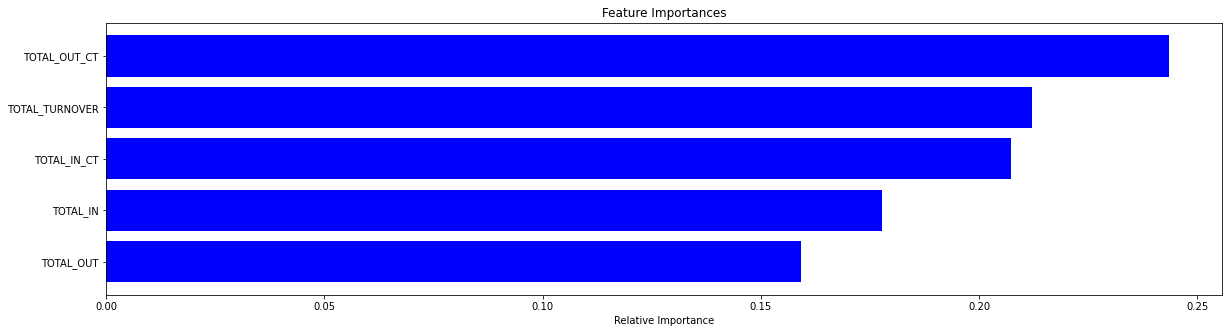

0.031496062992125984


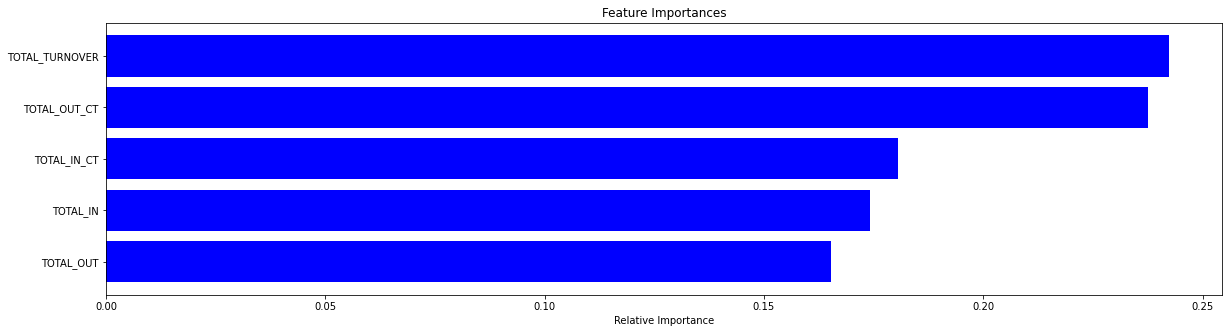

0.031496062992125984


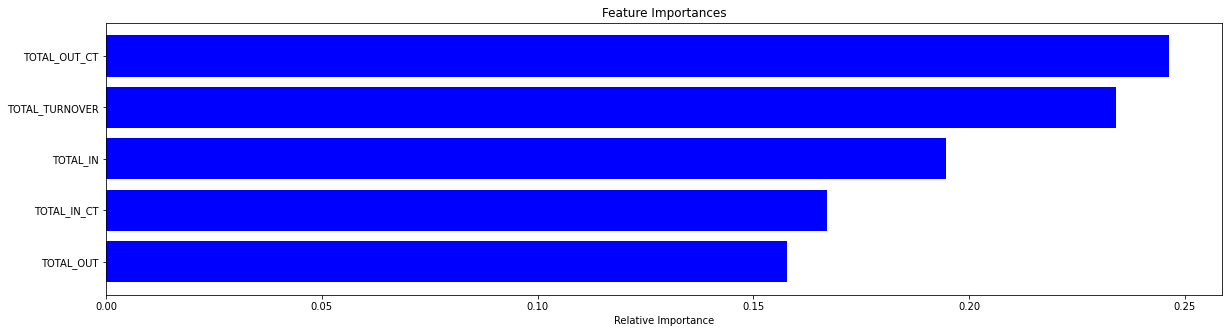

0.023622047244094488


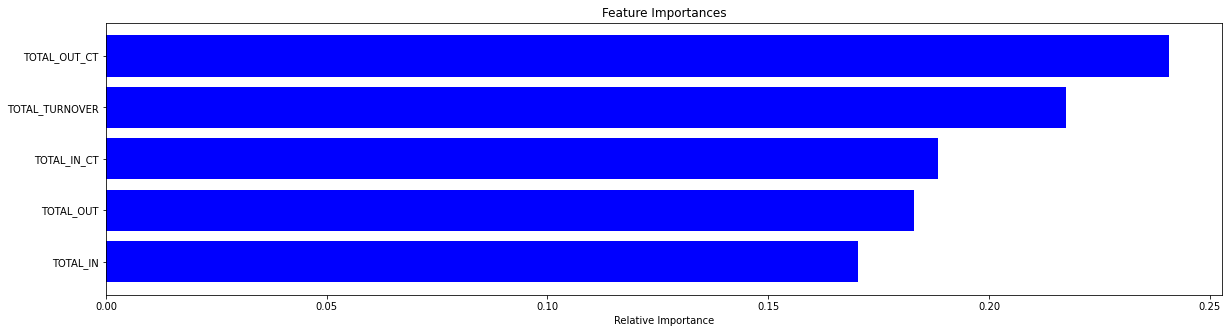

0.031496062992125984


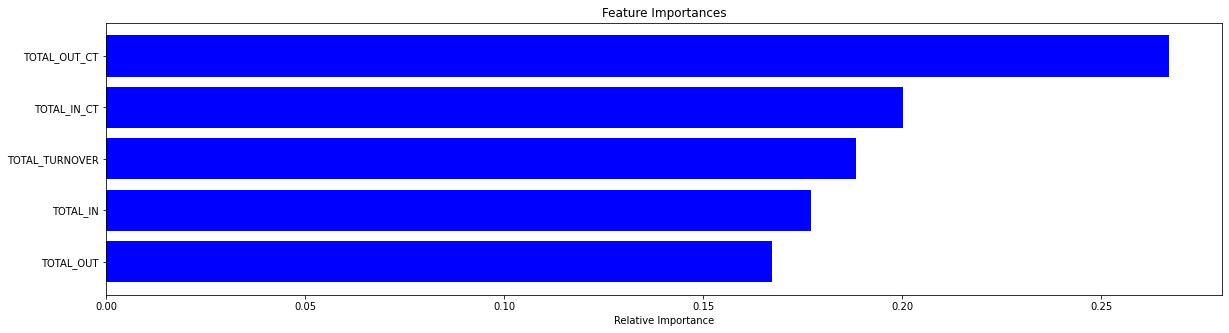

0.03937007874015748


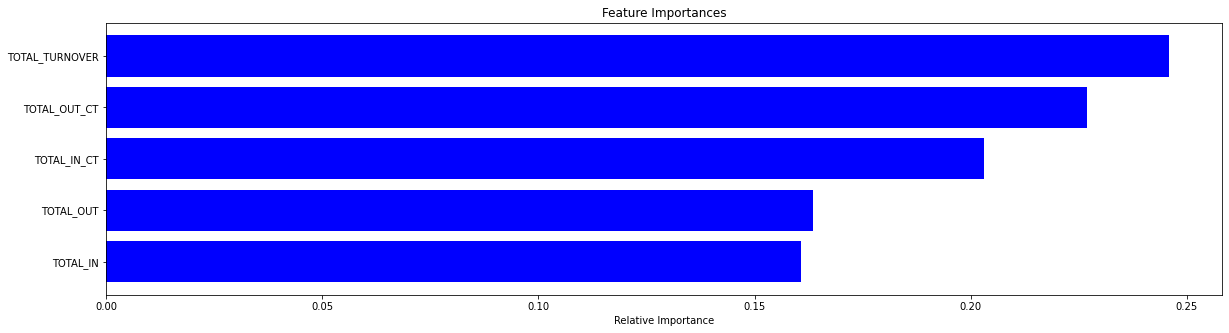

0.007874015748031496


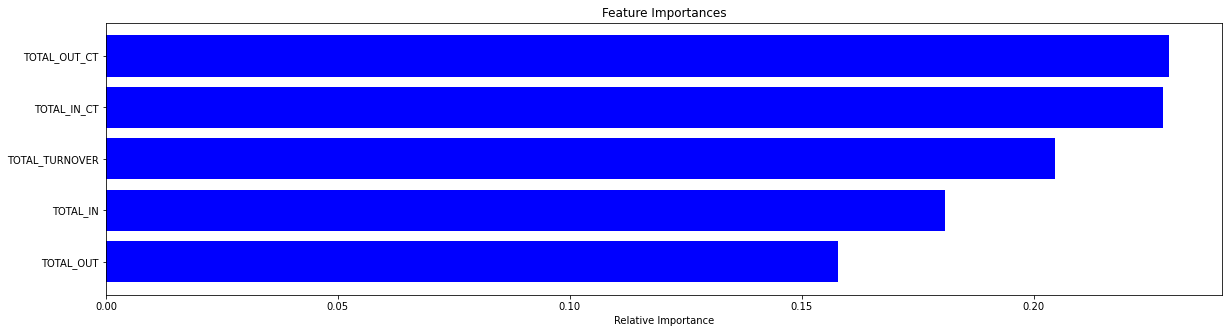

0.023622047244094488


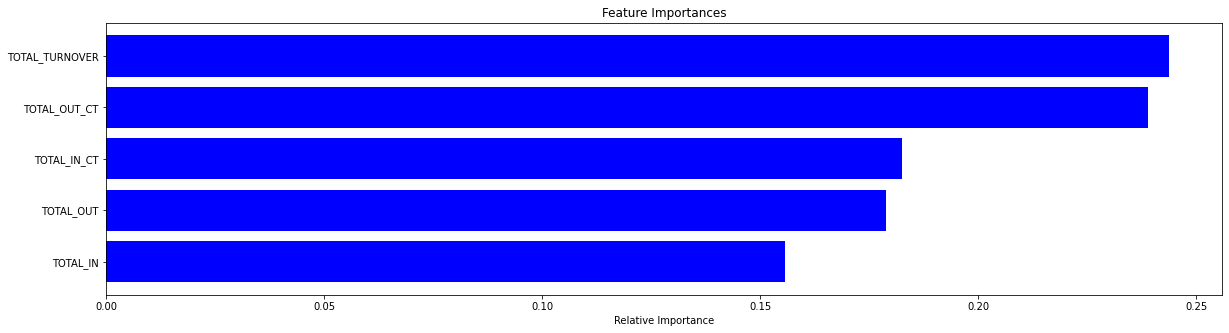

0.031496062992125984


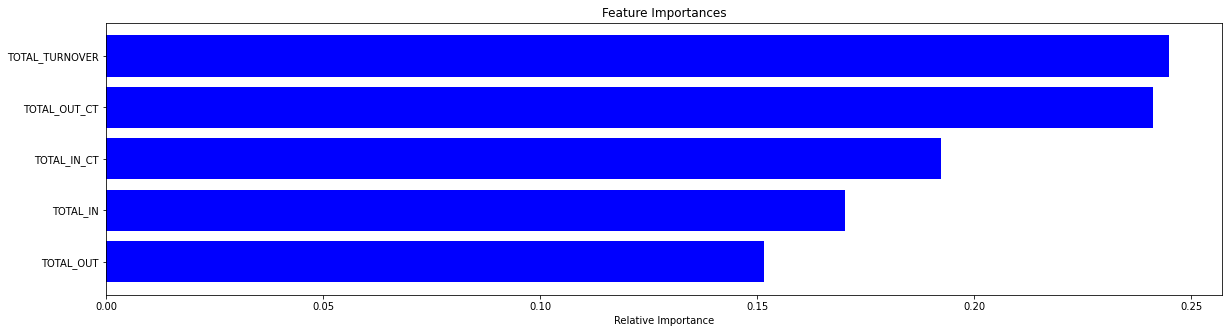

0.031496062992125984


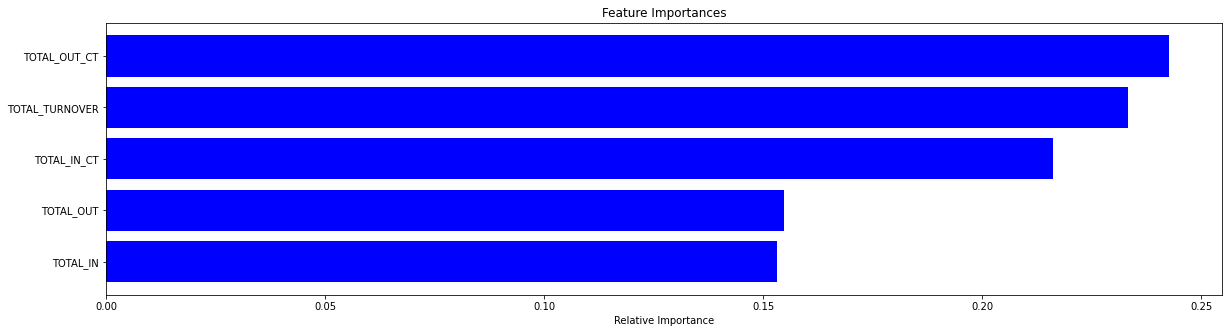

In [71]:
## experiment with random_state
score = []
for random_state in range(10):
  model_random_forest = RandomForestClassifier(max_depth=4, random_state=random_state)
  model_random_forest.fit(X_train, y_train)
  print(model_random_forest.score(X_test, y_test))

  features = ['TOTAL_TURNOVER', 'TOTAL_IN', 'TOTAL_IN_CT', 'TOTAL_OUT','TOTAL_OUT_CT']
  importances = model_random_forest.feature_importances_
  indices = np.argsort(importances)

  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances[indices], color='b', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

In [70]:
# the best result where TOTAL_OUT and TOTAL_IN evenly distributed to the TOTAL_OUT_CT and TOTAL_IN_CT.
#I assume that the algorithm works best this way and therefore manages to implement the classification well.

array([], dtype=float64)

## Noice column

In [60]:
df_nc = df[['TOTAL_TURNOVER', 'TOTAL_IN', 'TOTAL_IN_CT', 'TOTAL_OUT','TOTAL_OUT_CT', 'TOTAL_SAVING']]

# feature set
X=df_nc.iloc[:,1:6]
#label set
y=df_nc.iloc[:,0]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [61]:

model = RandomForestClassifier(max_depth=6, random_state=0)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.031496062992125984

In [62]:
features = ['TOTAL_TURNOVER', 'TOTAL_IN', 'TOTAL_IN_CT', 'TOTAL_OUT','TOTAL_OUT_CT','TOTAL_SAVING']
importances = model.feature_importances_
indices = np.argsort(importances)

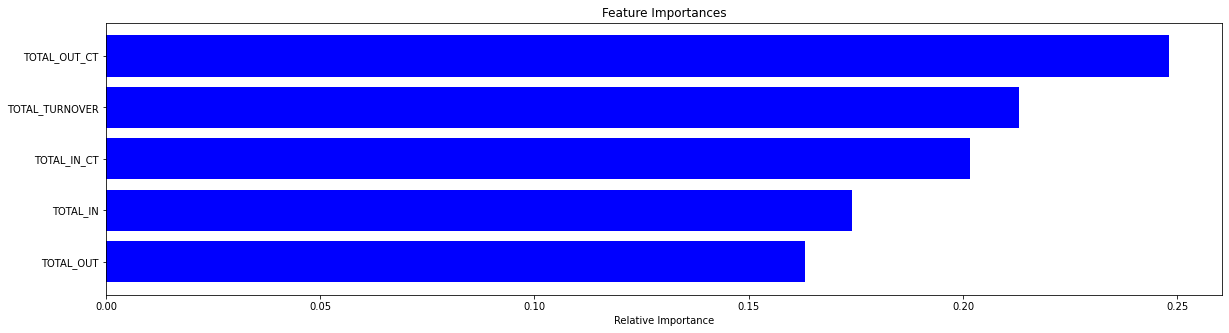

In [63]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# diff parts conclusion
# during the experiment showed that the improvements will be but insignificant.